# Machine Learning Practice Case - Market Segmentation and Basket Analysis

# 1.1 Importing Libraries

In [1]:
# Import dataframe necessities
import pandas as pd
import numpy as np
import scipy.stats as sp
import datetime
import math

# Import Visualization Libraries
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

# Import sklearn
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

# 1.2 Importing Datasets

In [2]:
#Import Dataset
df_raw = pd.read_excel(r'D:\Personal Project\Learning on Data Science\IYKRA\6. Machine Learning\Online Retail.xlsx')
df_raw

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

# 1.3. Data Profiling and Cleaning

**Data Description:**
- **InvoiceNo:** A unique identifier for the invoice. An invoice number shared across rows means that those transactions were performed in a single invoice (multiple purchases).
- **StockCode:** Identifier for items contained in an invoice.
- **Description:** Textual description of each of the stock item.
- **Quantity:** The quantity of the item purchased.
- **InvoiceDate:** Date of purchase.
- **UnitPrice:** Value of each item.
- **CustomerID:** Identifier for customer making the purchase.
- **Country:** Country of customer.

In [101]:
# Create a safe dataset
df1 = df_raw.copy()

## 1.3.1. Check for Missing Value

In [102]:
# Checking for missiing data
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [103]:
df1[df1['CustomerID'].isnull()].head()

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
622  2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445 2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446 2010-12-01 14:32:00       1.66         NaN  United Kingdom

From the results, we can see there are missing customer ID. We will delte these customers as they don't give us any insight on who buy the stock.

In [104]:
df1 = df1.dropna()
df1

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[406829 rows x 8 columns]

Let's check for missing data in the description

In [105]:
df1['Description'].isnull().sum()

0

There are no missing data in the description, so we can conclude that the data have been cleaned from missing values.

## 1.3.2. Check for duplicates

There is a possibility that the data has been cluttered with duplicates, let's investigate whether this is true or not.

In [106]:
#Check for duplicates
df1[df1.duplicated()]

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
527    2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
537    2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
539    2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
555    2010-12-01 11:49:00       2.95     17920.0  United Kingdom  
...                    ...        ...         ...             ...  
541675 2011-12-09 11:34:00       0.39     14446.0  United Kingdom  
541689 2011-12-09 11:34:00       2.49     14446.0  United Kingdom  
541692 2011-12-09 11:34:00       1.95     14446.0  United Kingdom  
541699 2011-12-09 11:34:00       2.10     14446.0  United Kingdom  
541701 2011-12-09 11:34:00       2.08     14446.0  United Kingdom  

[5225 rows x 8 columns]

In [107]:
#Drop Duplicates
df1 = df1.drop_duplicates()

## 1.3.3. Check for Data Types

In [108]:
# Checking for Data Types
df1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

The CustomerID data type is not right, instead of float64, it should be as string/object. So, we will change this. We also delete the decimals at the customerID

In [109]:
# Changing Data Types of CustomerID
df1['CustomerID'] = df1['CustomerID'].astype(str).str.replace(r'\b.0','') # the '\b.0' is to change decimals into empty space
df1['CustomerID']

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 401604, dtype: object

In [110]:
df1

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom  
1      2010-12-01 08:26:00       3.39      17850  United Kingdom  
2      2010-12-01 08:26:00       2.75      17850  United Kingdom  
3      2010-12-01 08:26:00       3.39      17850  United Kingdom  
4      2010-12-01 08:26:00       3.39      17850  United Kingdom  
...                    ...        ...        ...             ...  
541904 2011-12-09 12:50:00       0.85      12680          France  
541905 2011-12-09 12:50:00       2.10      12680          France  
541906 2011-12-09 12:50:00       4.15      12680          France  
541907 2011-12-09 12:50:00       4.15      12680          France  
541908 2011-12-09 12:50:00       4.95      12680          France  

[401604 rows x 8 columns]

## 1.3.4. Issues with Anomalies

After dealing with missing values and changing the data types, now we turn to data exploration to understand the data even further. Firs, let's start by describing the continous data set.

In [111]:
#Describing dataset
df1.describe()

Quantity      UnitPrice
count  401604.000000  401604.000000
mean       12.183273       3.474064
std       250.283037      69.764035
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000

From the table, we can observe that there are negative numbers in the quantity data. We should investigate and identify which data has negative quantity.

In [112]:
df1[df1['Quantity'] < 0].head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice CustomerID         Country  
141 2010-12-01 09:41:00      27.50      14527  United Kingdom  
154 2010-12-01 09:49:00       4.65      15311  United Kingdom  
235 2010-12-01 10:24:00       1.65      17548  United Kingdom  
236 2010-12-01 10:24:00       0.29      17548  United Kingdom  
237 2010-12-01 10:24:00       0.29      17548  United Kingdom

We can see, orders with negative Quantity have ['C'] character in their invoice. These are code for cancellation. Since we have no data on why these orders were being cancelled (i.e., broken shipping, etc.), I would like to assume that this data doesn't contribute much to helping us in segmenting our market. Therefore, I would like to remove the negative data.

In [113]:
df1 = df1[~(df1.Quantity<0)]
df1.describe()

Quantity      UnitPrice
count  392732.000000  392732.000000
mean       13.153718       3.125596
std       181.588420      22.240725
min         1.000000       0.000000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000

After removing the negative quantity data, note that the unit price has a minimum of zero which is impossible. Thus, we would also remove this.

In [114]:
df1 = df1[df1.UnitPrice>0]
df1.describe()

Quantity      UnitPrice
count  392692.000000  392692.000000
mean       13.119702       3.125914
std       180.492832      22.241836
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000

# 2. Data Exploration

## 2.1. Exploring Sales by Country

We have cleaned our dataset, now I want to explore the data even further. Firstly, I would like to know which country have the highest total amount of sales. Given that, this is a non-retail online store based in the UK, we expect that most of the sales proportion is in the UK. Thus, I would also like to explore how much of the sales is from the UK and outside the UK.

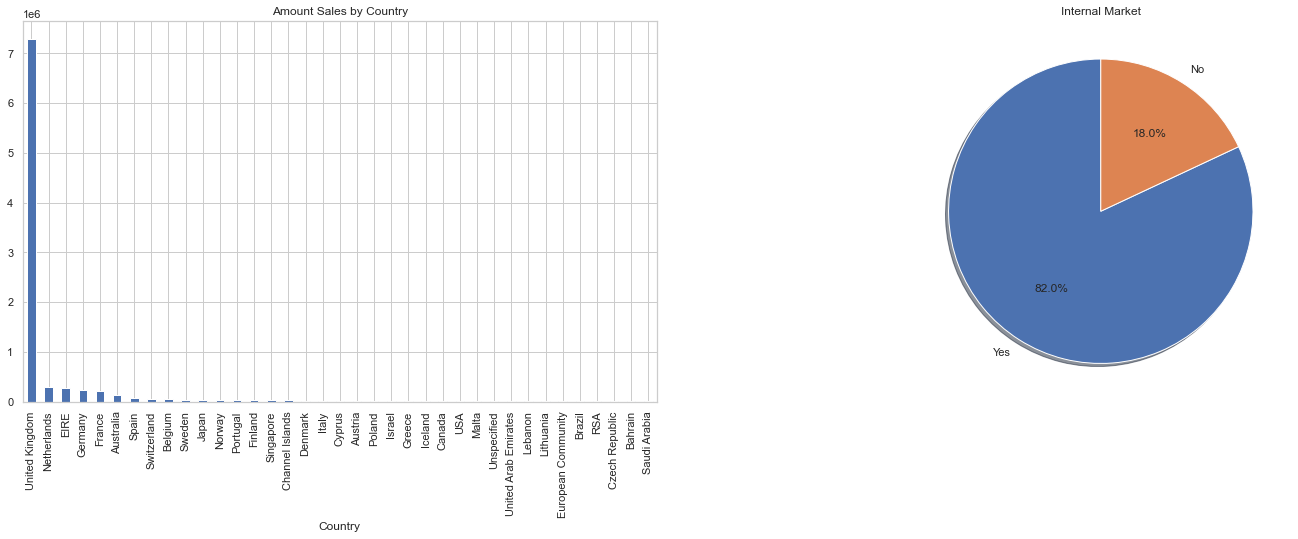

In [115]:
#Top Sales by Countries & Proportion of Sales (UK vs. Outside UK) 
df1['Total_Amount'] = df1['Quantity']*df1['UnitPrice']
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
sales = df1.groupby(["Country"])['Total_Amount'].sum().sort_values(ascending = False).plot(kind='bar', title='Amount Sales by Country')
df1['Internal'] = df1.Country.apply(lambda x: 'Yes' if x=='United Kingdom' else 'No' )
f2 = fig.add_subplot(122)
market = df1.groupby(["Internal"])['Total_Amount'].sum().sort_values(ascending = False)
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Internal Market')
plt.show()

As we displayed above, most of the sales came from inside the UK (82%) while there rest came from outside the UK. I would like to investigate the distribution of sales by country outside the UK.

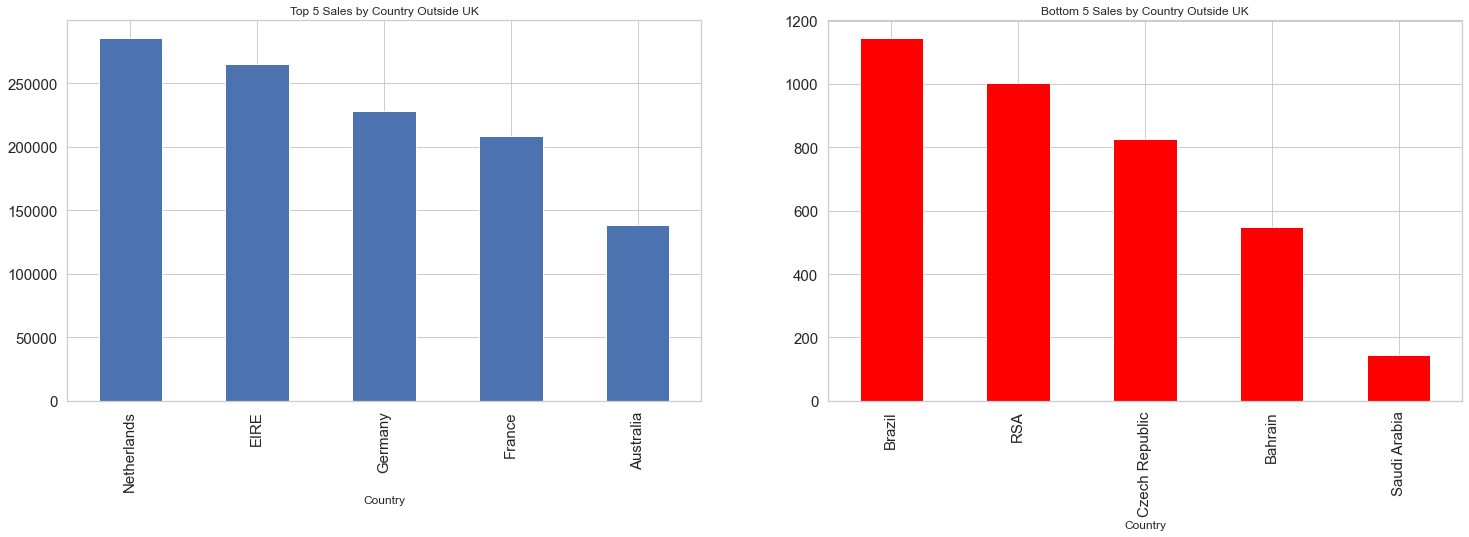

In [116]:
#Visualizing
salesOutdf = df1[df1.Country!='United Kingdom']

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
top5 = salesOutdf.groupby(["Country"])['Total_Amount'].sum().sort_values(ascending = False).head(5).plot(kind='bar', title='Top 5 Sales by Country Outside UK', fontsize = 15)
f2 = fig.add_subplot(122)
bottom5 = salesOutdf.groupby(["Country"])['Total_Amount'].sum().sort_values(ascending = False).tail(5).plot(kind='bar', title='Bottom 5 Sales by Country Outside UK', color='red', fontsize = 15)

From the results, we can see that the top 5 sales by country outside UK are Netherlands, EIRE(Ireland), Germany, France, and Australia. While the bottom 5 countries are Brazil, RSA (Republic of South Africa), Czech Republic, Bahrain, and Saudi Arabia.

## 2.2. Correlation

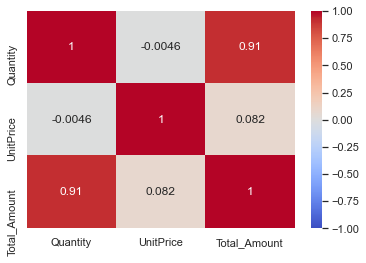

In [117]:
#Check Correlation between Quantity, UnitPrice, and Total Amount of Sales
df1_corr = df1[['Quantity','UnitPrice','Total_Amount']]
sns.heatmap(df1_corr.corr(), annot=True, vmin = -1, cmap='coolwarm')
plt.show()

From the heatmap, we can see that there are almost no correlation between Quantity and UnitPrice. Meanwhile, the correlations between total_amount with quantity are pretty high (r > 0.5) respectively. This make sense since quantity are part of the Total_Amount

We can assume that both UnitPrice and Quantity are **independent from each other** given their low corr., but to be sure let's check with spearman (since there distribution most likely will be nonparametric). 

In [133]:
# Spearman Corr
x1 = df1_corr['Quantity']
y1 = df1_corr['UnitPrice']
sp.spearmanr(x1,y1)

SpearmanrResult(correlation=-0.4148589626553972, pvalue=0.0)

The results show that both Quantity and UnitPrice is actually correlated to each other.

# 3. Model Development

## 3.1. Feature Engineering

RFM Model for Customer Value:<br>
Since our dataset is limited to the sales records, and didn´t include anothers information about our customers, we will use a RFM **(Recency, Frequency and Monetary Value)**, based model of customer value for finding our customer segments. The RFM model will take the transactions of a customer and calculate three important informational attributes about each customer:

- **Recency:** The value of how recently a customer purchased at the establishment
- **Frequency:** How frequent the customer’s transactions are at the establishment
- **Monetary value:** The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment

In [119]:
# Create Recency Variable
ref_date = df1.InvoiceDate.max() + datetime.timedelta(days=1)
print('Reference Date:', ref_date)
df1['Recency'] = (ref_date - df1.InvoiceDate).astype('timedelta64[D]')

# Aggregate data by each customer
custdf = df1.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total_Amount': 'sum'})

# Rename columns
custdf.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'Total_Amount': 'MonetaryValue'}, inplace=True)

Reference Date: 2011-12-10 12:50:00


In [120]:
# Resulting Data Frame
custdf

Recency  Frequency  MonetaryValue
CustomerID                                   
12346           326          1       77183.60
12347             2        182        4310.00
12348            75         31        1797.24
12349            19         73        1757.55
12350           310         17         334.40
...             ...        ...            ...
18280           278         10         180.60
18281           181          7          80.82
18282             8         12         178.05
18283             4        721        2045.53
18287            43         70        1837.28

[4338 rows x 3 columns]

Now we would like to investigate how is the distribution of each variable in the custdf.

Skewness: 1.2460475158158468
Kurtosis: 0.4305762982496799


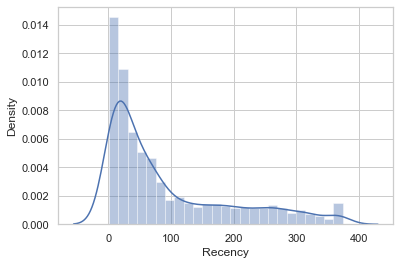

In [121]:
sns.distplot(custdf['Recency'])
print('Skewness:',custdf['Recency'].skew())
print('Kurtosis:',custdf['Recency'].kurt())

Skewness: 18.043529536033585
Kurtosis: 478.8730582273854


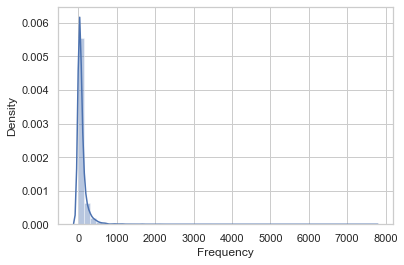

In [122]:
sns.distplot(custdf['Frequency'])
print('Skewness:',custdf['Frequency'].skew())
print('Kurtosis:',custdf['Frequency'].kurt())

Skewness: 19.339367981525175
Kurtosis: 478.68428853545845


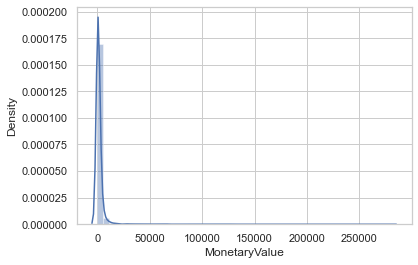

In [123]:
sns.distplot(custdf['MonetaryValue'])
print('Skewness:',custdf['MonetaryValue'].skew())
print('Kurtosis:',custdf['MonetaryValue'].kurt())

From the results above, we can conclude at least that each data is positively skewed:
- Recency: 1.25
- Frequency: 18.11
- MonetaryValue: 19.33

## 3.2. Data Preprocessing

Once we have created our customer value dataset, we will perform some preprocessing on the data. I will be using the K-means clustering algorithm. 

**First**, it is important to mean center the variable values. One of the requirements for proper functioning of the algorithm is the mean centering of the variable values. This ensures that all the variables are in the same range and the difference in ranges of values doesn't cause the algorithm to not perform well.

**Second**, I will transform each of the Recency, Freq, and Monetarvy Value given how each one of them has extreme positive skewness. I will be using the log tranformation.

In [124]:
# Log transforming the data
custdf['Recency_log'] = custdf['Recency'].apply(math.log)
custdf['Frequency_log'] = custdf['Frequency'].apply(math.log)
custdf['MonetaryValue_log'] = custdf['MonetaryValue'].apply(math.log)
feature_vector = ['MonetaryValue_log', 'Recency_log','Frequency_log']

# Scaling the data
cust_subset = custdf[feature_vector] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(cust_subset)
cust_scaled = scaler.transform(cust_subset)
pd.DataFrame(cust_scaled, columns=cust_subset.columns).describe().round(2).T

count  mean  std   min   25%   50%   75%   max
MonetaryValue_log  4338.0   0.0  1.0 -4.17 -0.68 -0.06  0.66  4.72
Recency_log        4338.0  -0.0  1.0 -2.63 -0.61  0.11  0.83  1.51
Frequency_log      4338.0   0.0  1.0 -2.78 -0.63  0.03  0.69  3.99

From the table, we can conclude that the scaling has been successful since the mean is equal to 0 and the variance is equal to 1.

<AxesSubplot:xlabel='Recency_log', ylabel='Density'>

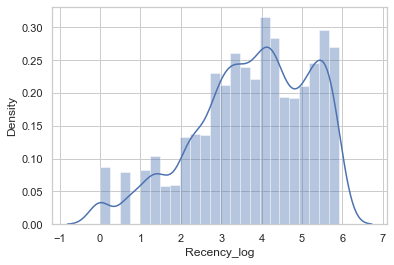

In [125]:
sns.distplot(custdf['Recency_log'])

<AxesSubplot:xlabel='Frequency_log', ylabel='Density'>

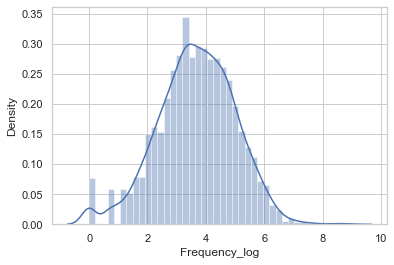

In [126]:
sns.distplot(custdf['Frequency_log'])

<AxesSubplot:xlabel='MonetaryValue_log', ylabel='Density'>

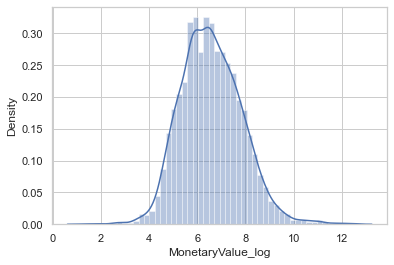

In [127]:
sns.distplot(custdf['MonetaryValue_log'])

From the visualization, we can also conclude that the log transformation has been succesful in making the distribution more normal.

## 3.3. K-Means

#### Finding ideal number of cluster

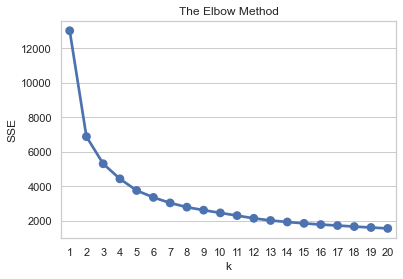

In [128]:
sse = {}
cl = 20

for k in range(1, cl+1):
    # Create a kmeans model on our data, using k clusters.
    kmeans = KMeans(n_clusters=k, init='k-means++', 
                    n_init=10,
                    max_iter=300,
                    tol=1e-04,
                    random_state=101)
    # Fit the KMeans Algo to our data
    kmeans.fit(cust_scaled)
    # SSE to closest cluster centroid
    sse[k] = kmeans.inertia_

#Plot the Elbow Method Graph
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

From the Elbow Method results, we can conclude that the optimal number of clusters is between 3-7. Then, using silhouette analysis, we will evaluate these numbers and decide which number is the optimal one.

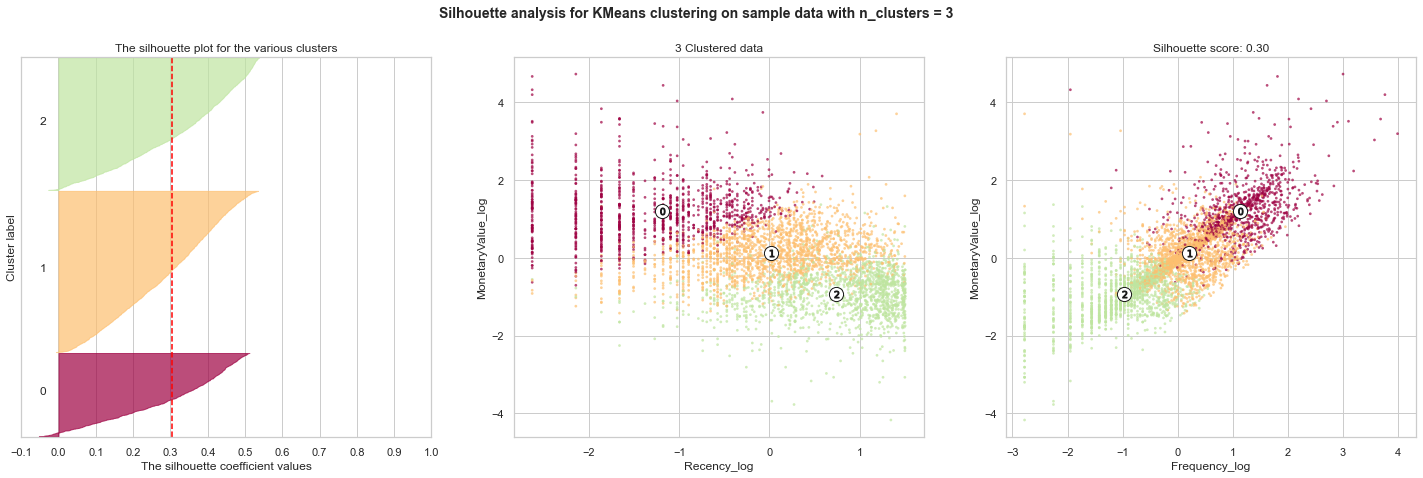

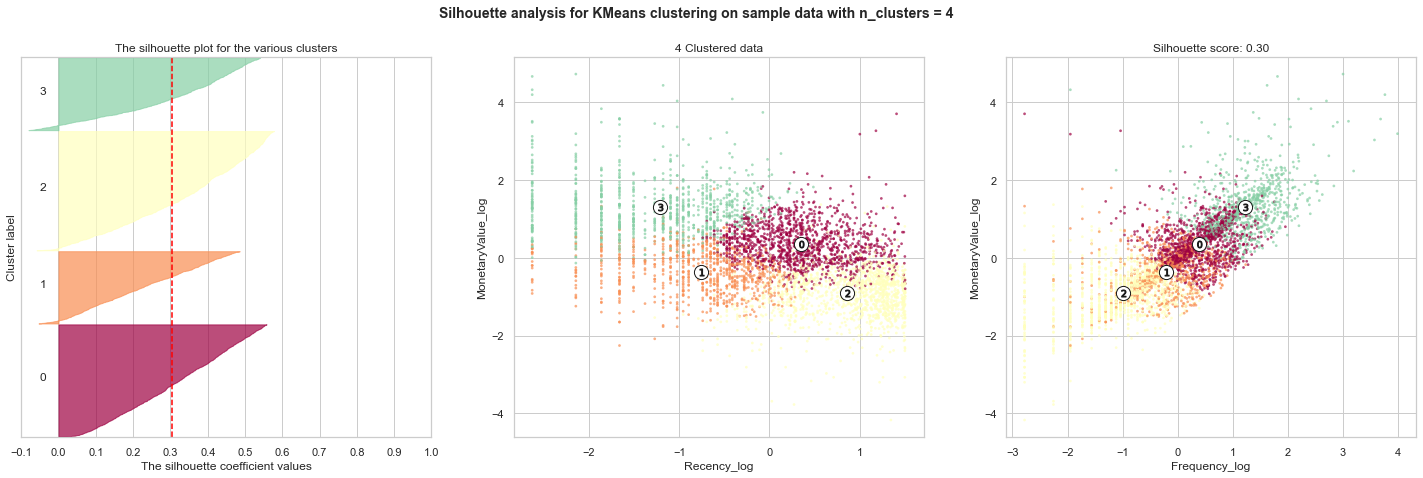

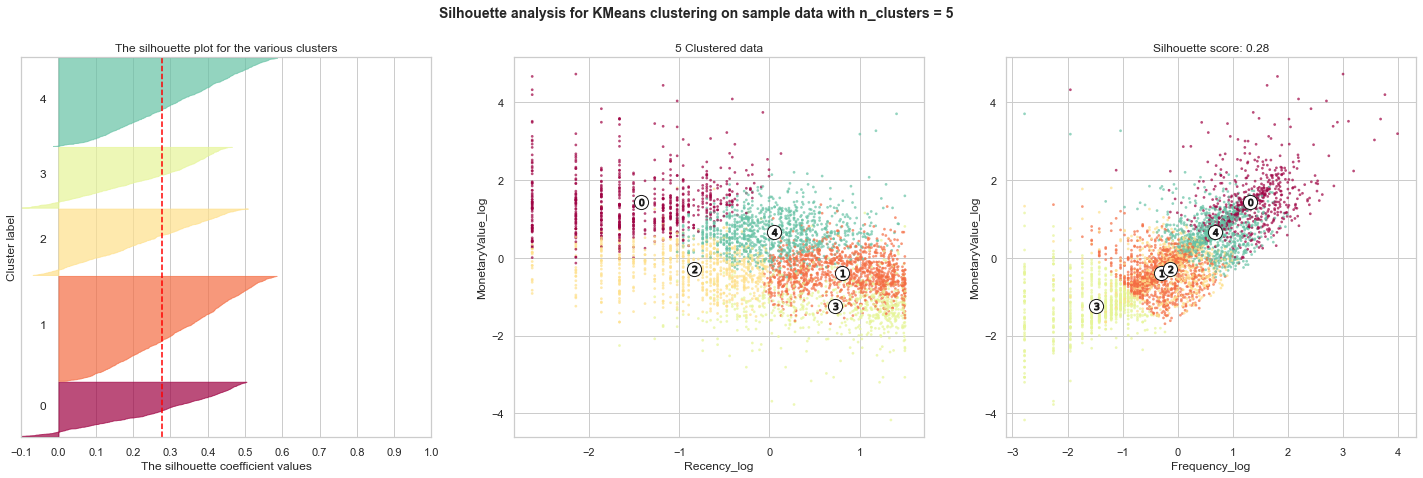

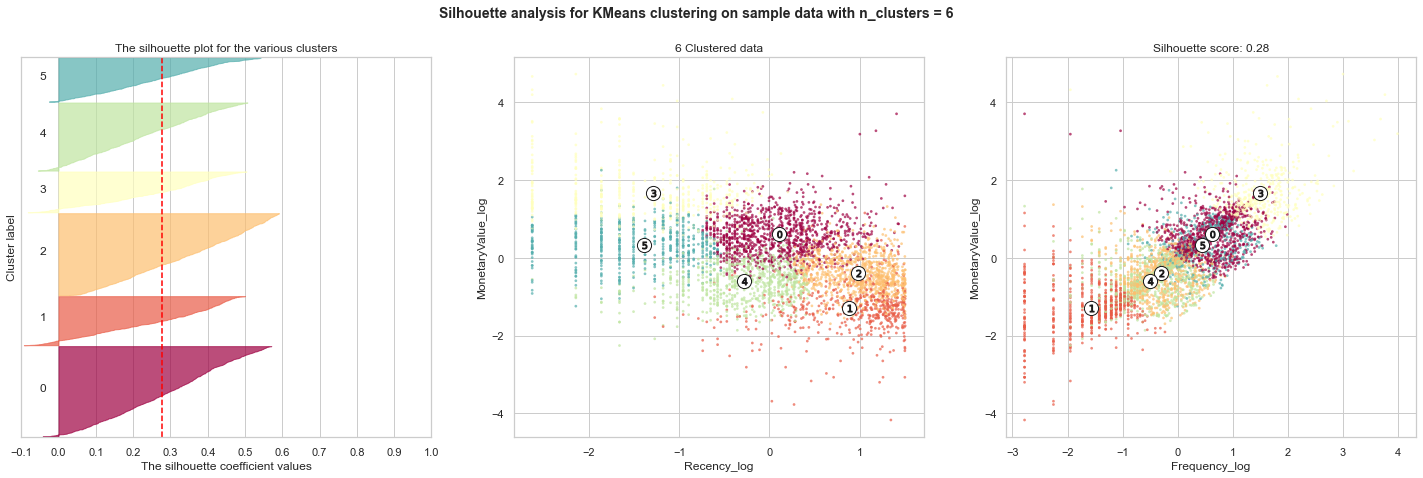

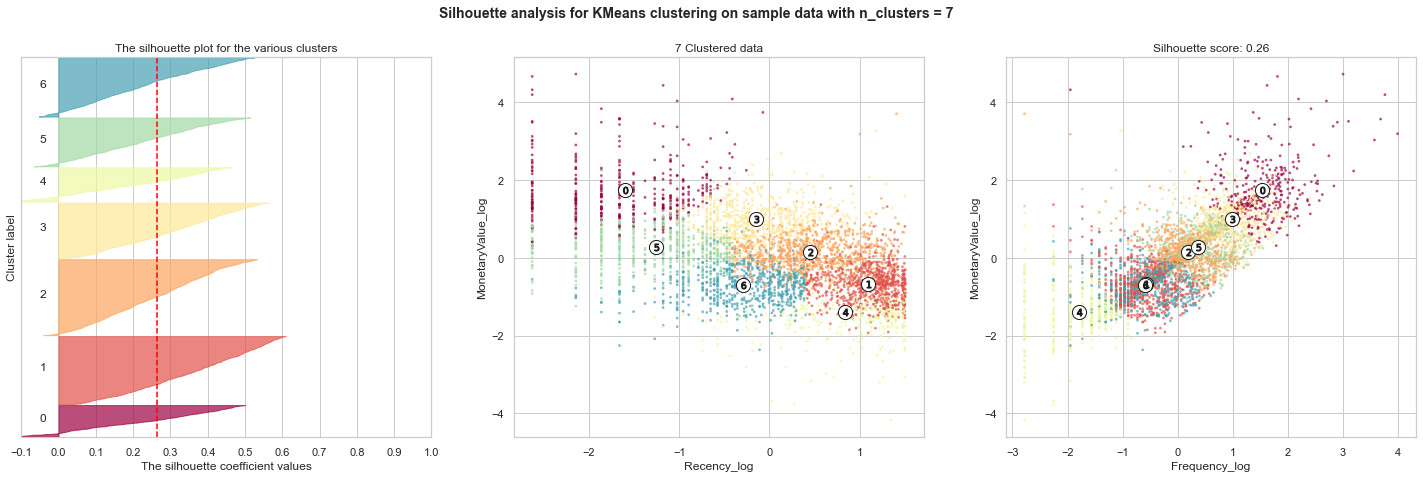

In [129]:
# I borrow this from https://www.kaggle.com/mgmarques/customer-segmentation-and-market-basket-analysis/notebook
cluster_centers = dict()
X_scaled = cust_scaled

for n_clusters in range(3,8,1):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

#### Cluster Center

In [130]:
# Check at the cluster center values after returning them to normal values from the log and scaled version.
features = ['MonetaryValue',  'Recency',  'Frequency']
for i in range(3,8,1):
    print("for {} clusters the silhouette score is {:1.4f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.3033
Centers of each cluster:
   MonetaryValue     Recency   Frequency
0    3338.332828    7.802044  175.014746
1     848.029623   44.583384   52.197293
2     226.665293  123.781419   10.764993
--------------------------------------------------
for 4 clusters the silhouette score is 0.3031
Centers of each cluster:
   MonetaryValue     Recency   Frequency
0    1142.701242   71.807473   66.156996
1     460.748996   14.599750   29.765137
2     229.200533  148.929352   10.694219
3    3744.009551    7.625666  198.021578
--------------------------------------------------
for 5 clusters the silhouette score is 0.2787
Centers of each cluster:
   MonetaryValue     Recency   Frequency
0    4390.608803    5.628394  220.374630
1     441.268335  137.602512   26.593311
2     508.179594   13.008634   32.472000
3     151.448562  122.053354    5.576137
4    1655.211804   46.412682   96.102776
--------------------------------------------------
for 6 clusters the 

From the Silhoutte Analysis we found that the optimal number of clusters is 3 because it has the **highest Silhouette Score with 0.3033.**

In [131]:
x_data = ['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6']
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(22, 80, 57, 0.5)', 'rgba(127, 65, 14, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
cutoff_quantile = 95
custdf['clusters_3'] = cluster_centers[3]['labels'] 
clusters = [3]

for n_clusters in clusters:
    cl = 'clusters_' + str(n_clusters)
    for fild in range(0, 3):
        field_to_plot = features[fild]        
        y_data = list()
        ymax = 0
        for i in np.arange(0,n_clusters):
            y0 = custdf[custdf[cl]==i][field_to_plot].values
            y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
            if ymax < max(y0): ymax = max(y0)
            y_data.insert(i, y0)

        traces = []

        for xd, yd, cls in zip(x_data[:n_clusters], y_data, colors[:n_clusters]):
                traces.append(go.Box(y=yd, name=xd, boxpoints=False, jitter=0.5, whiskerwidth=0.2, fillcolor=cls,
                    marker=dict( size=1, ),
                    line=dict(width=1),
                ))

        layout = go.Layout(
            title='Difference in {} with {} Clusters and {:1.2f} Score'.\
            format(field_to_plot, n_clusters, cluster_centers[n_clusters]['silhouette_score']),
            yaxis=dict( autorange=True, showgrid=True, zeroline=True,
                dtick = int(ymax/10),
                gridcolor='black', gridwidth=0.1, zerolinecolor='rgb(255, 255, 255)', zerolinewidth=2, ),
            margin=dict(l=40, r=30, b=50, t=50, ),
            paper_bgcolor='white',
            plot_bgcolor='white',
            showlegend=False
        )

        fig = go.Figure(data=traces, layout=layout)
        py.offline.iplot(fig)

From the results, above, we can categorize each clusters:
- **Cluster 0**:Have higher value in frequency and monetary value. This cluster also have a lower level of recency. Thus, we can conclude that this cluster consists of people who also recently buy from the online store in huge quantities and often.
- **Cluster 1**: Have the middle level of frequency, recency, and monetary value. Further investigation of the bar plot suggests this cluster consists of majority who also recently buy (at least 1 month before) from the store in small number and spend less amount of money. They occasionally do their transactions.
- **Cluster 2** This cluster consist of people who have bought from the store ranging from recently and last year. They do transactions in small quantities and spend less money than the other clusters. These cluster of people also do the least amount of transaction than the other two.